In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn import tree
from cf_matrix import make_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load diabetes dataset

dia_df = pd.read_csv('diabetes_data_upload.csv')
dia_df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [3]:
# Look at the data types

dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
# Investigate the different unique values for each column

for col in dia_df:
    print(dia_df[col].unique())

[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


In [5]:
# Check the class balance for the target variable "class"

dia_df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

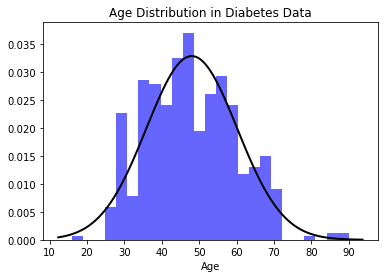

In [6]:
# Checking the distribution

mu, std = norm.fit(dia_df.Age)
plt.hist(dia_df.Age, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Age Distribution in Diabetes Data')
plt.xlabel('Age')
plt.show()

In [7]:
# Replacing the unique values from above with numerical values - 1 for present, 0 for not present

dia_df2 = dia_df.replace(['Yes', 'No', 'Male', 'Female', 'Positive', 'Negative'], [1, 0, 1, 0, 1, 0])

In [8]:
dia_df2

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1             0   
1             0               0                1        0             0   
2             1               0                0        1             0   
3             1               1                0        1             0   
4             1               0                1        1             1   
..          ...             ...              ...      ...           ...   
515           1               0                0        1             0   
516           1               0                0        1             1   
517           1               0                1        0             0   
518           0               0                1        1             0   
519           0               0                0        0             0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                  1                0                 1         1        1   
1                  0                1                 0         1        0   
2                  1                0                 1         1        0   
3                  1                0                 0         0        0   
4                  1                1                 1         1        1   
..               ...              ...               ...       ...      ...   
515                1                1                 0         0        0   
516                1                1                 0         0        0   
517                0                1                 1         0        1   
518                1                0                 0         1        0   
519                0                0                 0         0        0   

     class  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
515      1  
516      1  
517      1  
518      0  
519      0  

[520 rows x 17 columns]

In [9]:
# Split the data into features and targets, then splitting those into training/testing dataframes

X = dia_df2.drop('class',axis=1)
y = dia_df2[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [10]:
# Checking the shape of each training/testing dataframe

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (390, 16)
Training Labels Shape: (130, 16)
Testing Features Shape: (390, 1)
Testing Labels Shape: (130, 1)


In [11]:
# Creating a Decision Tree Classifier and fitting it to the training data

dtc_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=15, min_samples_leaf=5)   
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)

In [12]:
# Running the testing features thru the fitted model

y_predict = dtc_model.predict(X_test)

In [13]:
# Checking the Accuracy

accuracy_score(y_test,y_predict)

0.9230769230769231

In [14]:
target = list(dia_df2['class'].unique())
feature_names = list(X.columns)

In [15]:
# Printing a text representation of the decision tree

r = export_text(dtc_model, feature_names=feature_names)
print(r)

|--- Polyuria <= 0.50
|   |--- Gender <= 0.50
|   |   |--- Alopecia <= 0.50
|   |   |   |--- Age <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  34.50
|   |   |   |   |--- Irritability <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Irritability >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- Alopecia >  0.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  53.00
|   |   |   |   |--- class: 0
|   |--- Gender >  0.50
|   |   |--- Polydipsia <= 0.50
|   |   |   |--- Irritability <= 0.50
|   |   |   |   |--- weakness <= 0.50
|   |   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  57.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- weakness >  0.50
|   |   |   |   |   |--- Itching <= 0.50
|   |   |   |   |   |   |--- Alopecia <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Alopecia >  0.50
|   |   |   |   |   |   |   |--- cl

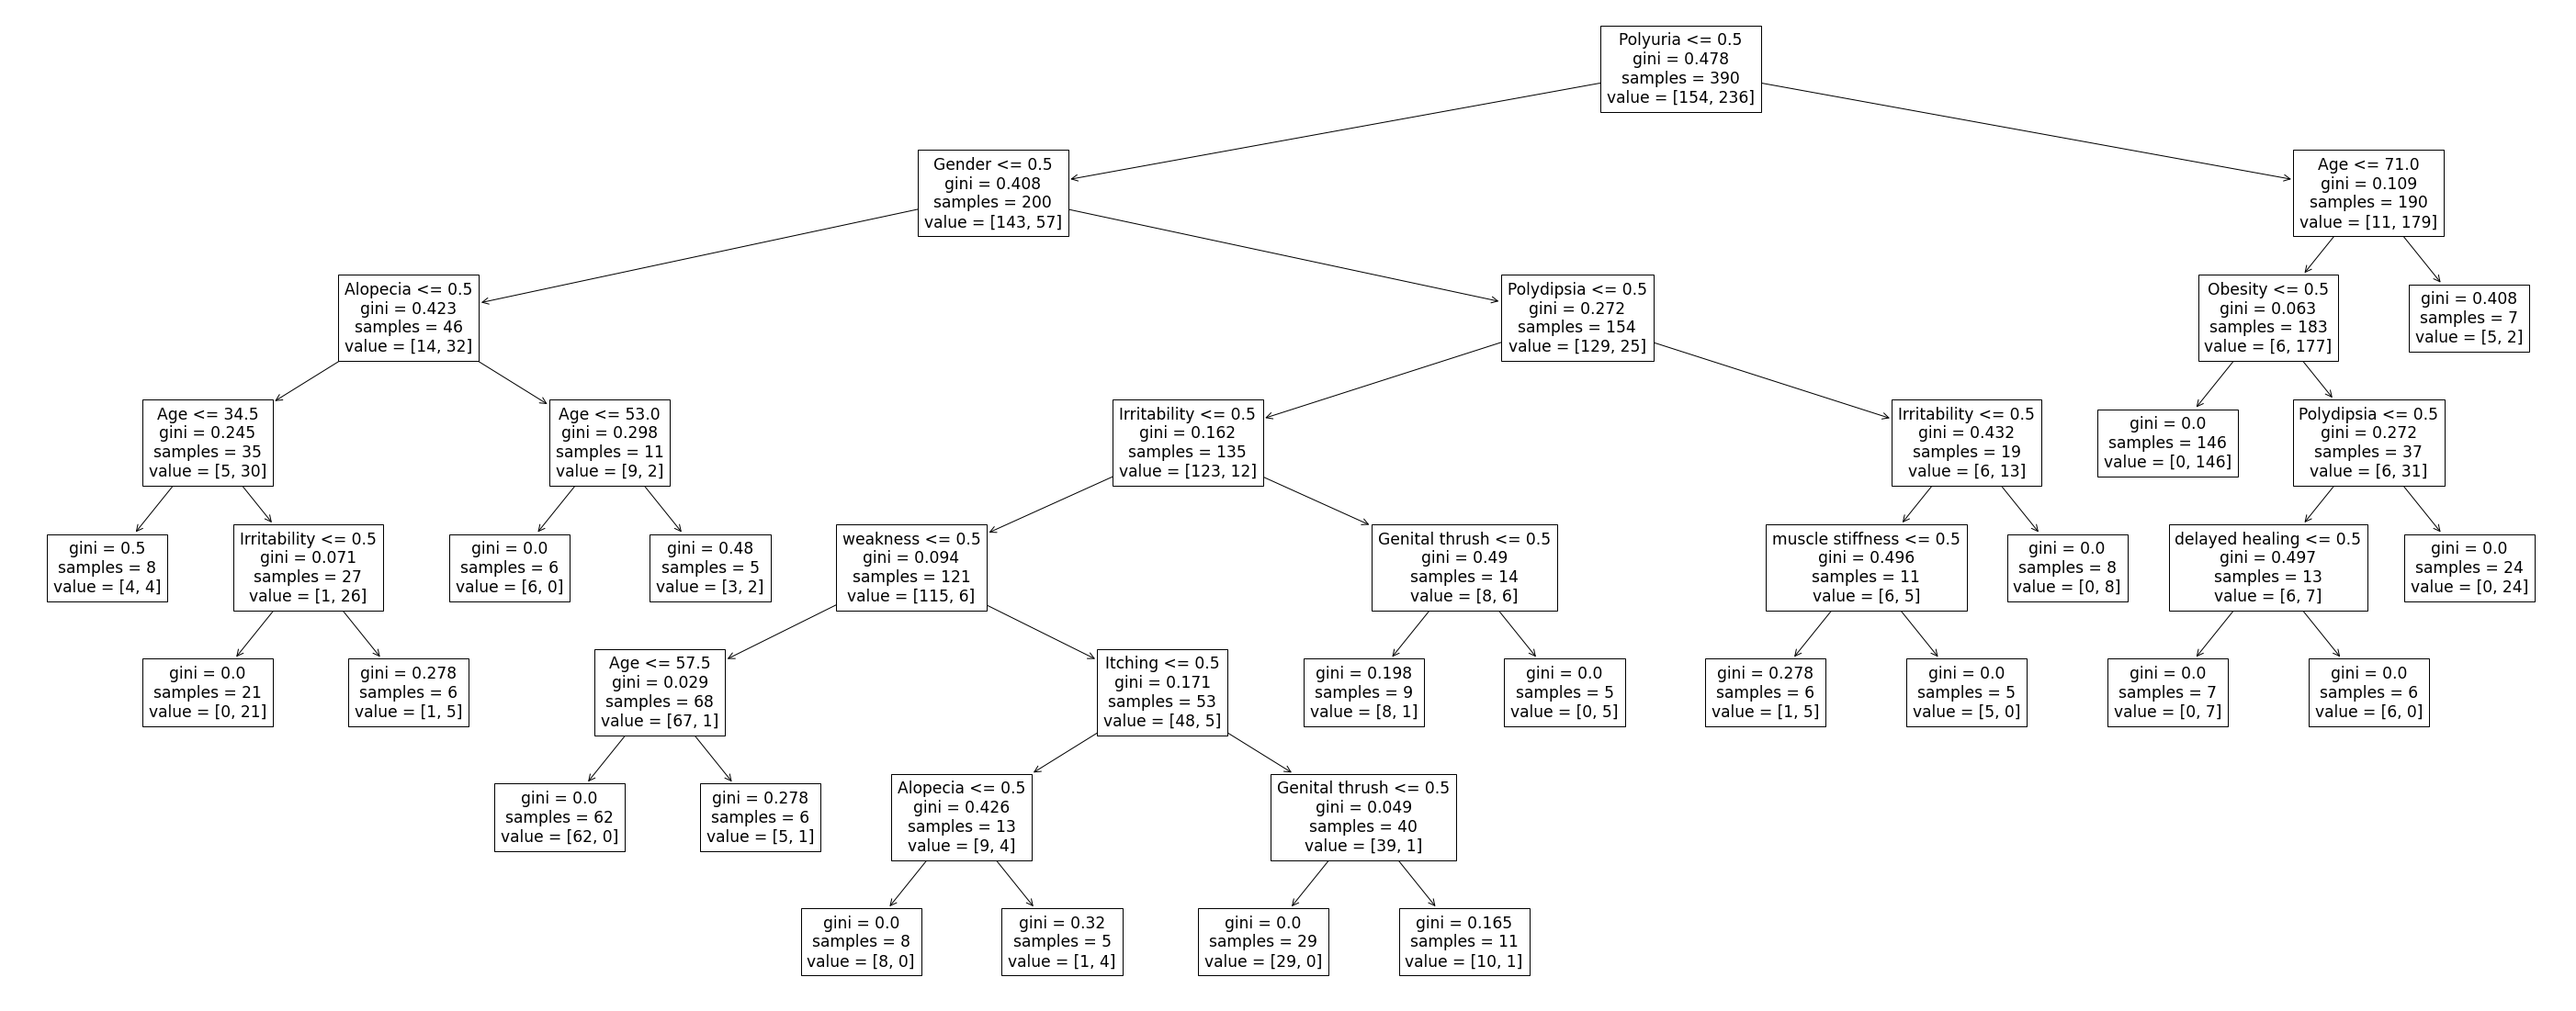

In [16]:
# drawing and saving a visual representation of the decision tree

plt.figure(figsize=(50,20))
tree.plot_tree(dtc_model.fit(X_train, y_train),feature_names=feature_names)
plt.savefig('tree.png')

In [17]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[43  3]
 [ 7 77]]


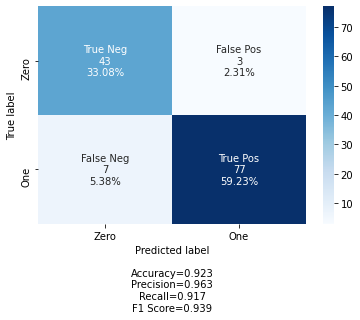

In [18]:
# Pretty confusion matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero','One']
make_confusion_matrix(cm,group_names=labels,categories=categories,cmap='Blues')
plt.savefig('cm.png')

In [19]:
# Calculating the importances of the various features and sorting the data

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtc_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [20]:
importances

feature  importance
2             Polyuria       0.504
1               Gender       0.121
3           Polydipsia       0.092
14            Alopecia       0.069
0                  Age       0.060
10        Irritability       0.040
11     delayed healing       0.039
7       Genital thrush       0.031
13    muscle stiffness       0.023
9              Itching       0.009
15             Obesity       0.009
5             weakness       0.002
4   sudden weight loss       0.000
6           Polyphagia       0.000
8      visual blurring       0.000
12     partial paresis       0.000

In [21]:
# Creating a Random Forest Classifier with default parameters

rfc = RandomForestClassifier(random_state = 42)

In [22]:
# creating a list of parameter options for the GridSearchCV to try, then fitting it to the data

forest_params = [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14)), 'criterion':['gini','entropy']}]
CV_rfc = GridSearchCV(rfc, forest_params, cv=10, scoring='accuracy', verbose=True)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy', verbose=True)

In [23]:
# Print the best parameters found by GridSearchCV

print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 1}


In [24]:
# Create a second Random Forest Classifier, but this time with the best parameters outlined above. Fit it to the training data

rfc1 = RandomForestClassifier(random_state=42, max_features=1, max_depth=11, criterion='gini')
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=1, random_state=42)

In [25]:
# Run the testing features through the trained model

y_predict = rfc1.predict(X_test)

In [26]:
# Print the accuracy for the random forest

print('Accuracy for Random Forest:\n',accuracy_score(y_test,y_predict))

Accuracy for Random Forest:
 0.9923076923076923


In [27]:
# Display Feature Importance

importances = rfc1.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

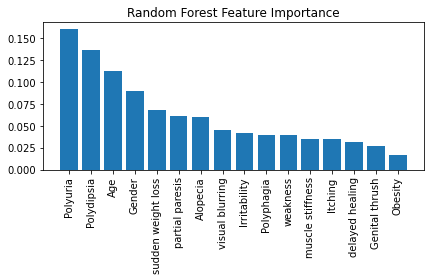

In [28]:
plt.title('Random Forest Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices],align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices],rotation=90)
plt.tight_layout()
plt.show()

In [30]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[45  1]
 [ 0 84]]


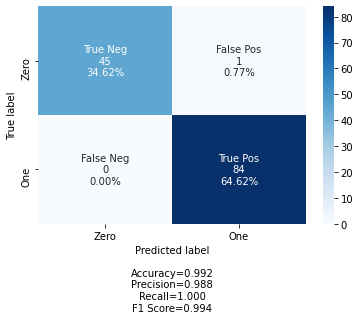

In [31]:
# Pretty confusion matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero','One']
make_confusion_matrix(cm,group_names=labels,categories=categories,cmap='Blues')
plt.savefig('cm.png')

In [29]:
# Display one decision tree in the random forest

fig = plt.figure(figsize=(300,200))
tree.plot_tree(rfc1.estimators_[0], feature_names=feature_names, filled=True, impurity=True, rounded=True)
fig.savefig('rcf_tree.png')